<h1>Projeto MLP: Classificação de sintomas de dor nas costas 🤕</h1> 

<p>Este projeto é parte da disciplina de Sistemas Inteligentes. Nele trabalharemos com a base de dados "Lower Back Pain Symptoms Dataset" com o objetivo de classificar os dados utilizando uma MLP.</p>

# Análise e tratamento de dados 🕵️

Nesta sessão iremos analisar nossa base de dados, buscando entender seus atributos, analisar possíveis anomalias e definir dados de treino, validação e teste.

Primeiramente vamos importar as bibliotecas necessárias sendo elas:
- Numpy: Operações matemáticas;
- Pandas: Manipulação de datasets;
- Sklearn: Modelos de machine learning.
- Seaborn/Matplotlib: Plotagem de gráficos

In [67]:
# importando bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

Agora importamos a base de dados utilizando o pandas

In [69]:
# Importando dados e visualizando algumas instâncias
df = pd.read_csv('./Dataset_spine.csv')
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


Como a coluna 'Unnamed:13' os rotúlos do dataset que não são útes para a classificação, então podemos remove-lá.

Nesse momento também separamos os atributos utilizados no treino da classificação


In [22]:
df = df.drop(['Unnamed: 13'], axis=1)
y = df['Class_att']
X = df.drop(['Class_att'], axis=1)

Agora, verificamos se há dados faltantes em alguma das colunas

In [15]:
print(df.isnull().sum())

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


 Como não encontramos nenhum NaN, podemos assumir que não há dados faltando em nenhuma das colunas, portanto não será necessário aplicar oversampling ou técnicas similares.

 Em seguida, vamos visualizar os outliers.

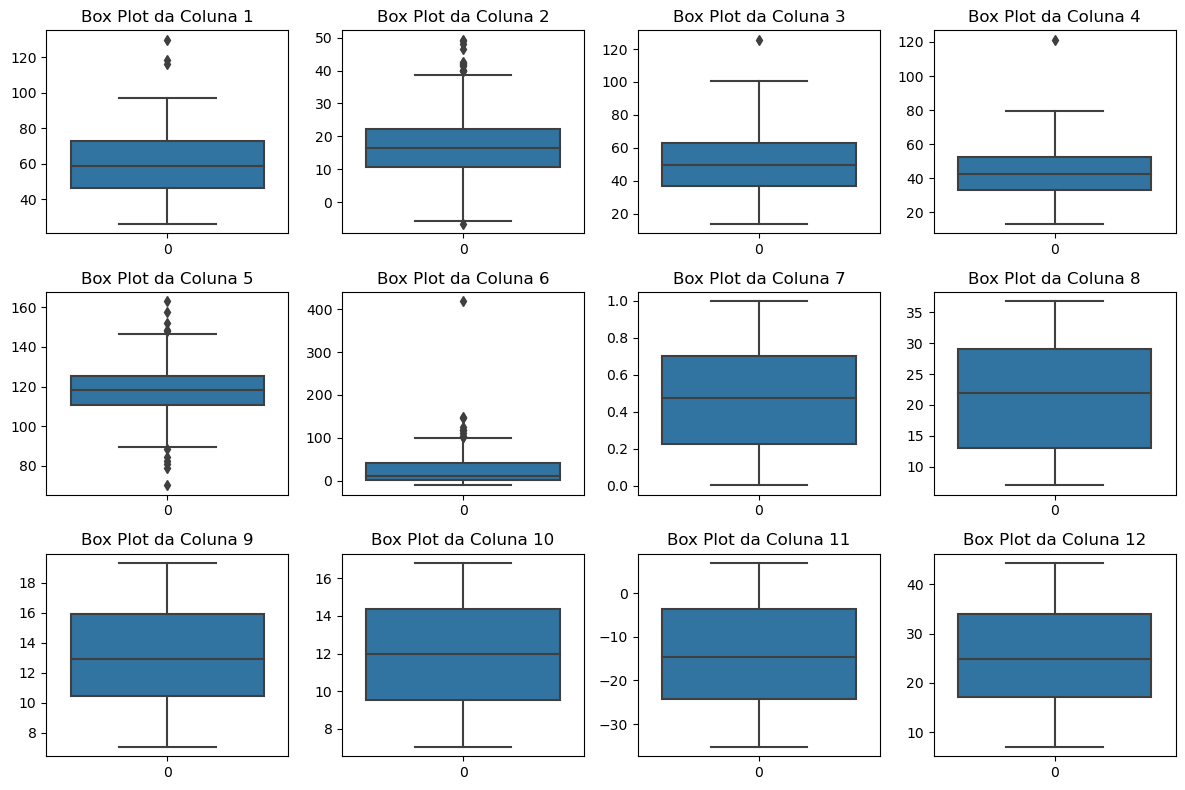

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crie uma grade de subplots 3x4 (3 linhas e 4 colunas)
fig, axes = plt.subplots(3, 4, figsize=(12, 8))

# Itere pelas colunas e adicione os boxplots aos subplots
for col in range(1, 13):
    row = (col - 1) // 4  # Calcule a linha atual
    col_idx = (col - 1) % 4  # Calcule a coluna atual
    ax = axes[row, col_idx]  # Obtenha o subplot atual

    sns.boxplot(df[f'Col{col}'], ax=ax)
    ax.set_title(f'Box Plot da Coluna {col}')

# Ajuste o layout
plt.tight_layout()

# Exiba o gráfico
plt.show()

posições do outlier (vamos usar?)

In [61]:
from scipy import stats
z = np.abs(stats.zscore(df['Col5']))
threshold = 3
# Position of the outlier
print(np.where(z > threshold))

(array([ 85, 167, 180]),)



# Primeiro Treino 💪

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

In [ ]:
model = MLPClassifier(verbose=True)
model.get_params()

In [ ]:
model.fit(X_train, y_train)

In [65]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

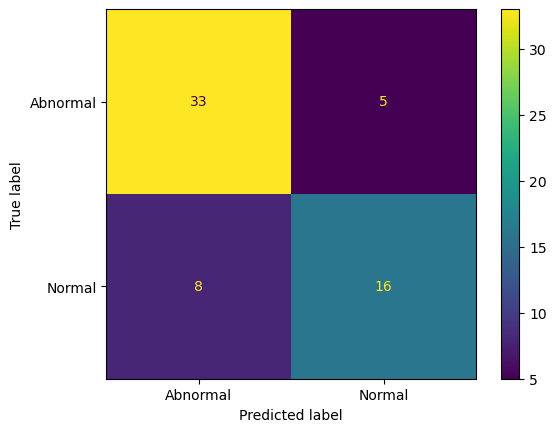

In [68]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
plt.show()

# using kfold
acho que nao funcionou mto bem

In [ ]:
kf = KFold(n_splits=3, shuffle=False)

In [ ]:
model = MLPClassifier(verbose=False)
model.get_params()

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(X)):
  print(f"iteration {i}:")
  X_train = X.iloc[train_index]
  y_train = y.iloc[train_index]
  X_test = X.iloc[test_index]
  y_test = y.iloc[test_index]

  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  print(classification_report(y_test, y_pred))

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_pred, y_test, pos_label=1)